NYC Taxi Descriptive Analysis

created by Alex


based on dataset: df_nyc_processed.csv

In [2]:
import pandas as pd 
import numpy as np
import datetime as dt
import zipfile
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline

In [3]:
#Checks to see if a requested file can be found.
def FileCheck(fn):
    try:
      open(fn, "r")
      return 1
    except IOError:
      print ("Error: File does not appear to exist.")
      return 0

In [4]:
# show numbers as float not scientific notation for funtions like describe
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# using the relpath should allow this file to open on mac and windows computers without trouble.

# Source data csv file to be opened.
# the file has the same name as the uncompresses NYC taxi data.

file_name = "df_nyc_processed.csv"

# Try to open the file
try:
    file_path = os.path.relpath(file_name)

    with open(file_path, "rb") as f:
        df_nyc_analysis = pd.read_table(f, sep=",",  index_col=0)  # not first column in csv is index
        f.close()

# Give feedback if the file can't be found.        
except:
    FileCheck(file_path )

/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
# Convert pickup and drop offs to datetime objects and reduce counts and duration to save memory
def convData(data):
    data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
    data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])
    data.passenger_count = data.passenger_count.astype(int)
    data.trip_duration = data.trip_duration.astype(int)
    data.trip_duration = round((data['trip_duration'] / 60),2) # time analysis is now in decimal options

#Run the function    
convData(df_nyc_analysis)

In [6]:
# check data types prior to start of analysis
df_nyc_analysis.dtypes

id                             object
vendor_id                       int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
pickup_dayofwk_num              int64
pickup_dayofwk_nm              object
pickup_weekend                 object
pickup_hr                       int64
pickup_day_seg                 object
is_holiday                       bool
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
trip_duration                 float64
calc_tm_diff_in_min           float64
passenger_count                 int64
passenger_grp                  object
distance_km                   float64
Temp                          float64
Windchill                     float64
Wind Speed                    float64
Gust Speed                    float64
Precip                        float64
Conditions                     object
dtype: object

In [6]:
# check nulls just to be sure before analysis
df_nyc_analysis.isnull().sum()

id                           0
vendor_id                    0
pickup_datetime              0
dropoff_datetime             0
pickup_dayofwk_num           0
pickup_dayofwk_nm            0
pickup_weekend               0
pickup_hr                    0
pickup_day_seg               0
is_holiday                   0
pickup_longitude             0
pickup_latitude              0
dropoff_longitude            0
dropoff_latitude             0
trip_duration                0
calc_tm_diff_in_min          0
passenger_count              0
passenger_grp                0
distance_km                  0
Temp                   1451630
Windchill               973141
Wind Speed               11977
Gust Speed               11977
Precip                   11977
Conditions               11977
dtype: int64

In [8]:
df_nyc_analysis.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_dayofwk_num,pickup_dayofwk_nm,pickup_weekend,pickup_hr,pickup_day_seg,is_holiday,...,calc_tm_diff_in_min,passenger_count,passenger_grp,distance_km,Temp,Windchill,Wind Speed,Gust Speed,Precip,Conditions
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,0,Monday,Weekday,17,Afternoon,False,...,7.580,1,1-4 Passengers,1.498,nan,-0.500,27.800,57.400,0.300,Overcast
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,6,Sunday,Weekend,0,Night,False,...,11.050,1,1-4 Passengers,1.804,nan,nan,7.400,0.000,0.000,Unknown
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,Tuesday,Weekday,11,Morning,False,...,35.400,1,1-4 Passengers,6.381,nan,-14.300,24.100,46.300,0.000,Clear
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,2,Wednesday,Weekday,19,Evening,False,...,7.150,1,1-4 Passengers,1.485,nan,3.300,25.900,35.200,0.000,Clear
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,5,Saturday,Weekend,13,Afternoon,False,...,7.250,1,1-4 Passengers,1.188,nan,nan,9.300,0.000,0.000,Clear


In [8]:
# Add Company Name of Yellow or Green Taxi
 
def vendor_nm(row):
    if row['vendor_id'] == 1:
        value = 'Green Taxi'   
    else:
        value = 'Yellow Taxi'
    return value
 
df_nyc_analysis['Vendor'] = df_nyc_analysis.apply(vendor_nm, axis=1)

In [9]:
# reorder columns

df_nyc_analysis = df_nyc_analysis[['id', 'vendor_id','Vendor', 'pickup_datetime','dropoff_datetime',
                         'pickup_dayofwk_num','pickup_dayofwk_nm','pickup_weekend','pickup_hr',
                         'pickup_day_seg','is_holiday','pickup_longitude','pickup_latitude','dropoff_longitude',
                         'dropoff_latitude','trip_duration','calc_tm_diff_in_min',
                         'passenger_count','passenger_grp','distance_km','Conditions']]
 
df_nyc_analysis.head()

,id,vendor_id,Vendor,pickup_datetime,dropoff_datetime,pickup_dayofwk_num,pickup_dayofwk_nm,pickup_weekend,pickup_hr,pickup_day_seg,...,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,calc_tm_diff_in_min,passenger_count,passenger_grp,distance_km,Conditions
0,id2875421,2,Yellow Taxi,2016-03-14 17:24:55,2016-03-14 17:32:30,0,Monday,Weekday,17,Afternoon,...,-73.982,40.768,-73.965,40.766,0.120,7.580,1,1-4 Passengers,1.498,Overcast
1,id2377394,1,Green Taxi,2016-06-12 00:43:35,2016-06-12 00:54:38,6,Sunday,Weekend,0,Night,...,-73.980,40.739,-73.999,40.731,0.180,11.050,1,1-4 Passengers,1.804,Unknown
2,id3858529,2,Yellow Taxi,2016-01-19 11:35:24,2016-01-19 12:10:48,1,Tuesday,Weekday,11,Morning,...,-73.979,40.764,-74.005,40.710,0.580,35.400,1,1-4 Passengers,6.381,Clear
3,id3504673,2,Yellow Taxi,2016-04-06 19:32:31,2016-04-06 19:39:40,2,Wednesday,Weekday,19,Evening,...,-74.010,40.720,-74.012,40.707,0.120,7.150,1,1-4 Passengers,1.485,Clear
4,id2181028,2,Yellow Taxi,2016-03-26 13:30:55,2016-03-26 13:38:10,5,Saturday,Weekend,13,Afternoon,...,-73.973,40.793,-73.973,40.783,0.120,7.250,1,1-4 Passengers,1.188,Clear


In [9]:
# In 6 months how many rides do our 2 companies undertake

print ("Unique number of pickups between our 2 companies", df_nyc_analysis.shape[0])

Unique number of pickups between our 2 companies 1451630


In [10]:
# What is the total distance our 2 companies have travelled in 6 months time

print( "Total distance travelled in 6 mnths", round(df_nyc_analysis['distance_km'].sum()).astype(int), "km")

Total distance travelled in 6 mnths 4996644 km


In [11]:
# How many times have we travelled around the earth?

# earth circumference = 40,075 km

earth_travel = round(df_nyc_analysis['distance_km'].sum()).astype(int) / 40075
earth_travel = round(earth_travel).astype(int)

print ("Our 2 companies, in total, have travelled around the earth", earth_travel, "times")

Our 2 companies, in total, have travelled around the earth 125 times


In [12]:
# Collectively, we've transported X passangers

print ("Collectively, we've moved", df_nyc_analysis['passenger_count'].sum(), "passengers")

Collectively, we've moved 2417062 passengers


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


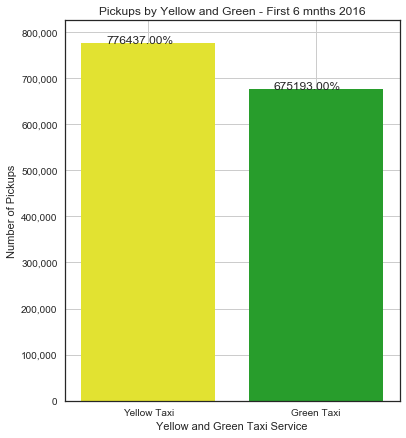

In [14]:
# What are the number of taxi pickups by each Vendor?

fig, ax = plt.subplots(figsize=(6, 7))

colors = ["yellow","green"]  
myPalette = sns.xkcd_palette(colors)
sns.set(style="white")

sns.countplot(x="Vendor",  data=df_nyc_analysis,palette= myPalette ) 
plt.grid()
ax.set(title='Pickups by Yellow and Green - First 6 mnths 2016', 
       xlabel='Yellow and Green Taxi Service', ylabel='Number of Pickups')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #label y axis nicely
plt.ylim(0,825000)
fig.show();

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


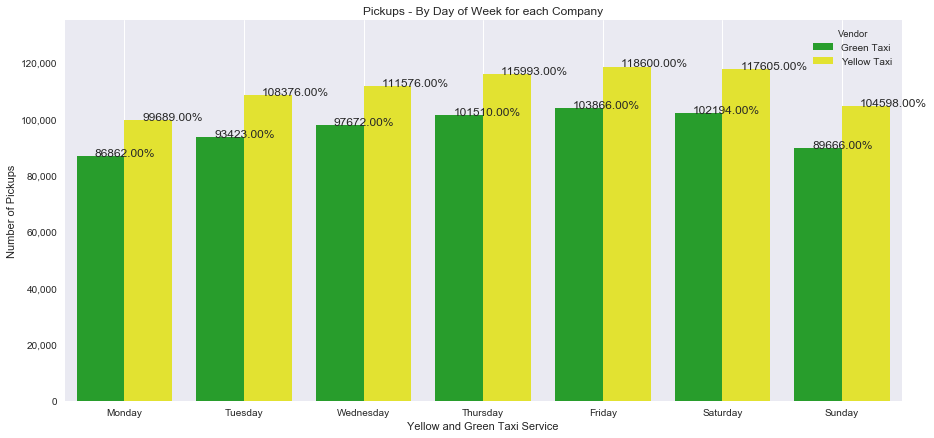

In [12]:
# What is the pickup distribution by our 2 companies by Day of Week

#prep data
df_nyc_analysis["day_category"] = df_nyc_analysis["pickup_dayofwk_nm"].astype('category', 
                                                        categories=["Monday","Tuesday","Wednesday","Thursday",
                                                                    "Friday", "Saturday", "Sunday"])

ct = pd.crosstab(df_nyc_analysis.Vendor, df_nyc_analysis.day_category)
stacked_data = ct.stack().reset_index().rename(columns={0:'value'})

fig, ax = plt.subplots(figsize=(15, 7))

colors = [ "green","yellow" ]  
myPalette = sns.xkcd_palette(colors)

sns.set(style="white")

sns.barplot(x=stacked_data.day_category, y=stacked_data.value , hue=stacked_data.Vendor, palette= myPalette)
plt.grid()
ax.set(title='Pickups - By Day of Week for each Company', 
       xlabel='Yellow and Green Taxi Service', ylabel='Number of Pickups')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #label y axis nicely
plt.ylim(0,135000)
fig.show()

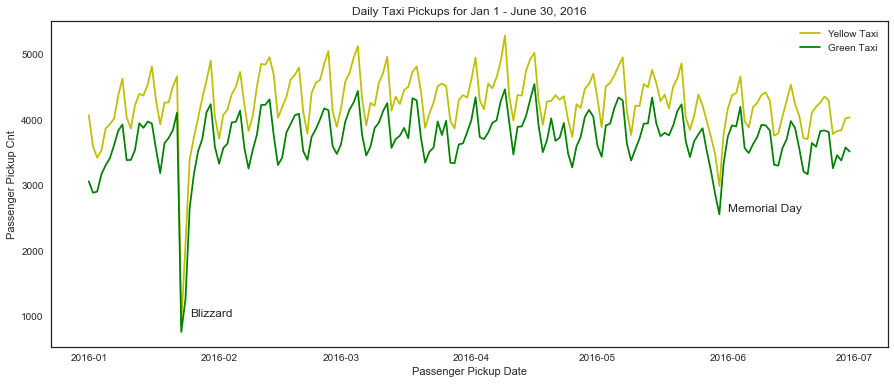

In [45]:
# Being NYC, have we did we have any major interuptions in our business
# What is the daily flucation in fare pickups for our 2 companies

# prep data
df_nyc_analysis["only_pkup_date"] = [d.date() for d in df_nyc_analysis["pickup_datetime"]]  #need just dt , not dt/time

line_data_yellow = df_nyc_analysis.query("Vendor == 'Yellow Taxi'")
line_data_yellow = pd.DataFrame(line_data_yellow[['only_pkup_date']])
line_data_yellow = line_data_yellow.groupby(['only_pkup_date']).size()
line_data_yellow = line_data_yellow.to_frame()
line_data_yellow = line_data_yellow.rename(columns={0: 'Cnt'}).reset_index()

line_data_green = df_nyc_analysis.query("Vendor == 'Green Taxi'")
line_data_green = pd.DataFrame(line_data_green[['only_pkup_date']])
line_data_green = line_data_green.groupby(['only_pkup_date']).size()
line_data_green = line_data_green.to_frame()
line_data_green = line_data_green.rename(columns={0: 'Cnt'}).reset_index()

fig, ax = plt.subplots(figsize=(15,6))

ax.plot(line_data_yellow.only_pkup_date, line_data_yellow.Cnt, 'y', label='Yellow Taxi')
ax.plot(line_data_green.only_pkup_date, line_data_green.Cnt, 'g', label='Green Taxi')

ax.text(dt.date(2016, 1, 25), 1000, "Blizzard")
ax.text(dt.date(2016, 6,  1), 2600, "Memorial Day")

plt.legend()
plt.title("Daily Taxi Pickups for Jan 1 - June 30, 2016")   
plt.xlabel("Passenger Pickup Date") 
plt.ylabel("Passenger Pickup Cnt") 
plt.show();

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


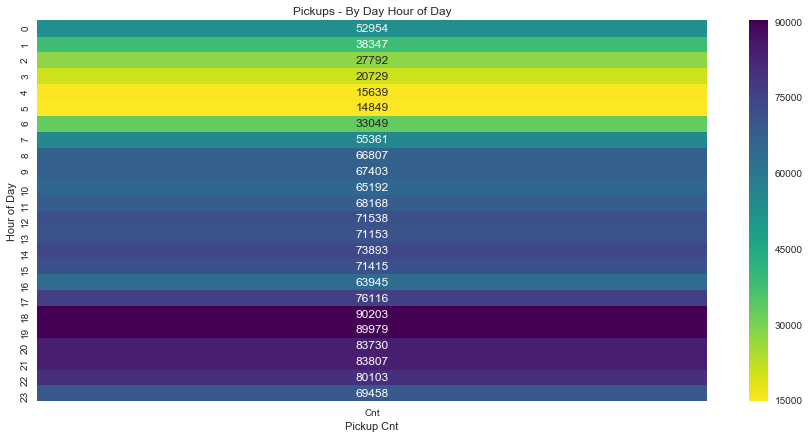

In [46]:
# Use a heatmap to show distribution of rides by hour regardless of day

#prep data
heat = pd.DataFrame(df_nyc_analysis[['pickup_hr']])
heat = heat.groupby(['pickup_hr']).size()
heat = heat.to_frame()
heat = heat.rename(columns={0: 'Cnt'})

#plot
fig, ax = plt.subplots(figsize=(15, 7))
sns.set(style="white")

sns.heatmap(heat, annot=True, fmt="g", cmap='viridis_r')

plt.grid()
ax.set(title='Pickups - By Day Hour of Day', 
       xlabel='Pickup Cnt', ylabel='Hour of Day')
fig.show();

In [79]:

#prep data - need to create day of pick up into category type in order to sort correctly
df_nyc_analysis["day_seg_category"] = df_nyc_analysis["pickup_day_seg"].astype('category', 
                                                        categories=["Night","Morning","Afternoon","Evening"])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


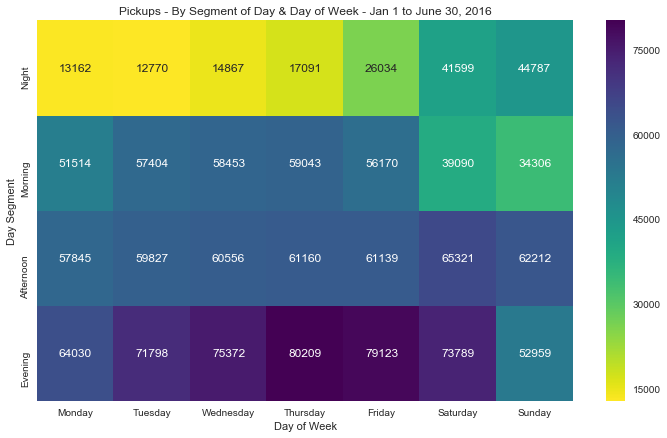

In [85]:
# Using a heat maps show me the hourly level of traffic based on the day of the week

#prep data - need to create day seg of pick up into category type in order to sort correctly
df_nyc_analysis["day_seg_category"] = df_nyc_analysis["pickup_day_seg"].astype('category', 
                                                        categories=["Night","Morning","Afternoon","Evening"])
df_nyc_analysis["day_category"] = df_nyc_analysis["pickup_dayofwk_nm"].astype('category', 
                                                        categories=["Monday","Tuesday","Wednesday","Thursday",
                                                                    "Friday", "Saturday", "Sunday"])
heat_dayseg = pd.DataFrame(df_nyc_analysis[['day_category', 'day_seg_category']])
heat_dayseg = heat_dayseg.groupby(['day_category','day_seg_category']).size()
heat_dayseg = heat_dayseg.to_frame()
heat_dayseg = heat_dayseg.rename(columns={0: 'Cnt'})
heat_dayseg = pd.pivot_table(heat_dayseg, values = 'Cnt', index='day_seg_category', columns = 'day_category')

#plot
fig, ax = plt.subplots(figsize=(12, 7))
sns.set(style="white")

sns.heatmap(heat_dayseg, annot=True, fmt="g", cmap='viridis_r')

plt.grid()
ax.set(title='Pickups - By Segment of Day & Day of Week - Jan 1 to June 30, 2016', 
       xlabel='Day of Week', ylabel='Day Segment')
fig.show();

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


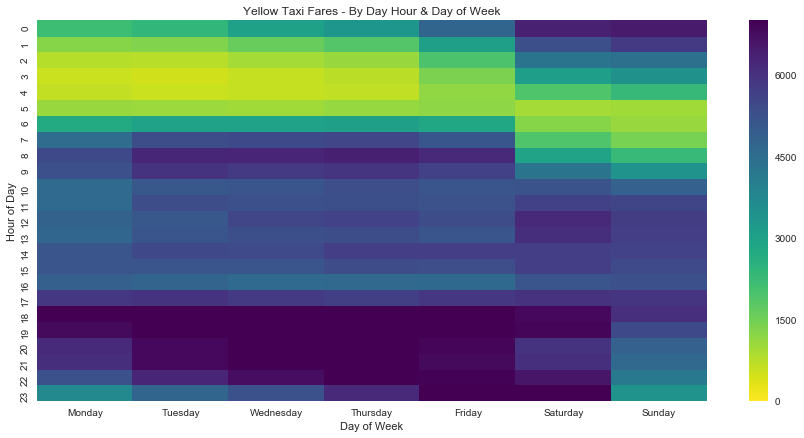

In [19]:
#prep data - need to create day of pick up into category type in order to sort correctly
df_nyc_analysis["day_category"] = df_nyc_analysis["pickup_dayofwk_nm"].astype('category', 
                                                        categories=["Monday","Tuesday","Wednesday","Thursday",
                                                                    "Friday", "Saturday", "Sunday"])

#prep data - for Yellow taxi only (need to create day of pick up into category type in order to sort correctly)
heat_day_yellow = pd.DataFrame(df_nyc_analysis[['pickup_hr', 'day_category','vendor_id','Vendor']])
heat_day_yellow = heat_day_yellow[heat_day_yellow["vendor_id"] == 2]  #Yellow Taxi
heat_day_yellow = heat_day_yellow.groupby(['pickup_hr','day_category']).size()
heat_day_yellow = heat_day_yellow.to_frame()
heat_day_yellow = heat_day_yellow.rename(columns={0: 'Cnt'})
heat_day_yellow = pd.pivot_table(heat_day_yellow, values = 'Cnt', index='pickup_hr', columns = 'day_category')

#plot
fig, ax = plt.subplots(figsize=(15, 7))
sns.set(style="white")

sns.heatmap(heat_day_yellow, # annot=True, exclude numbers appearing in heatmap
            fmt="g", cmap='viridis_r', vmin=0, vmax=7000)

plt.grid()
ax.set(title='Yellow Taxi Fares - By Day Hour & Day of Week', 
       xlabel='Day of Week', ylabel='Hour of Day')
fig.show();

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


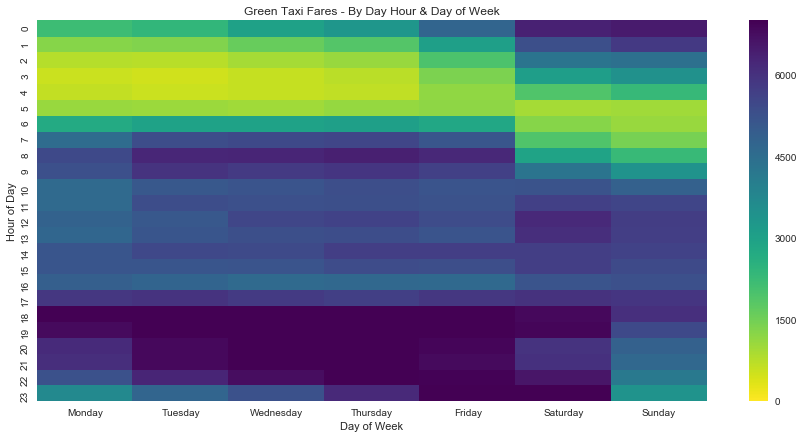

In [25]:
#prep data - need to create day of pick up into category type in order to sort correctly
df_nyc_analysis["day_category"] = df_nyc_analysis["pickup_dayofwk_nm"].astype('category', 
                                                        categories=["Monday","Tuesday","Wednesday","Thursday",
                                                                    "Friday", "Saturday", "Sunday"])

#prep data - for Green taxi only (need to create day of pick up into category type in order to sort correctly)
heat_day_green = pd.DataFrame(df_nyc_analysis[['pickup_hr', 'day_category','vendor_id','Vendor']])
heat_day_green = heat_day_green[heat_day_green["vendor_id"] == 2]  #green Taxi
heat_day_green = heat_day_green.groupby(['pickup_hr','day_category']).size()
heat_day_green = heat_day_green.to_frame()
heat_day_green = heat_day_green.rename(columns={0: 'Cnt'})
heat_day_green = pd.pivot_table(heat_day_green, values = 'Cnt', index='pickup_hr', columns = 'day_category')

#plot
fig, ax = plt.subplots(figsize=(15, 7))
sns.set(style="white")

sns.heatmap(heat_day_green, # annot=True, exclude numbers appearing in heatmap
            fmt="g", cmap='viridis_r', vmin=0, vmax=7000)

plt.grid()
ax.set(title='Green Taxi Fares - By Day Hour & Day of Week', 
       xlabel='Day of Week', ylabel='Hour of Day')
fig.show();

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


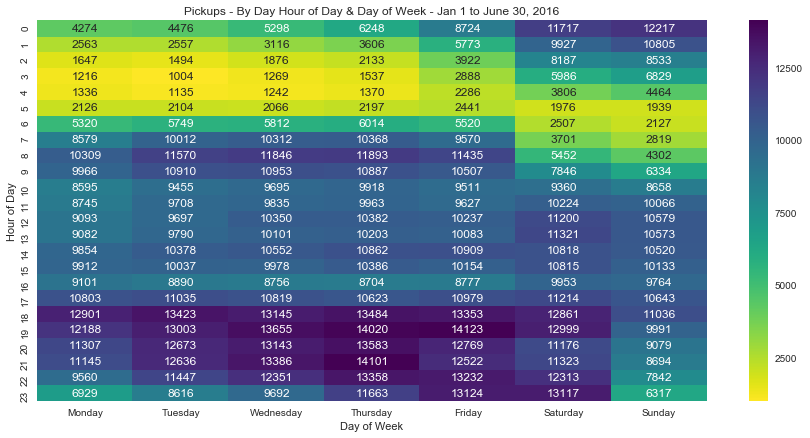

In [78]:
# Using a heat maps show me the hourly level of traffic based on the day of the week

#prep data - need to create day of pick up into category type in order to sort correctly
df_nyc_analysis["day_category"] = df_nyc_analysis["pickup_dayofwk_nm"].astype('category', 
                                                        categories=["Monday","Tuesday","Wednesday","Thursday",
                                                                    "Friday", "Saturday", "Sunday"])
heat_day = pd.DataFrame(df_nyc_analysis[['pickup_hr', 'day_category']])
heat_day = heat_day.groupby(['pickup_hr','day_category']).size()
heat_day = heat_day.to_frame()
heat_day = heat_day.rename(columns={0: 'Cnt'})
heat_day = pd.pivot_table(heat_day, values = 'Cnt', index='pickup_hr', columns = 'day_category')

#plot
fig, ax = plt.subplots(figsize=(15, 7))
sns.set(style="white")

sns.heatmap(heat_day, annot=True, fmt="g", cmap='viridis_r')

plt.grid()
ax.set(title='Pickups - By Day Hour of Day & Day of Week - Jan 1 to June 30, 2016', 
       xlabel='Day of Week', ylabel='Hour of Day')
fig.show();

In [119]:
#df_nyc_analysis.describe()

time_v_distance = df_nyc_analysis[['calc_tm_diff_in_min','distance_km']]

time_v_distance.describe()

,calc_tm_diff_in_min,distance_km
count,1451630.000,1451630.000
mean,14.019,3.442
std,11.594,4.070
min,0.500,0.000
25%,6.650,1.238
50%,11.070,2.099
75%,17.920,3.881
max,719.620,890.655


In [129]:
from numpy import median

print ("Median trip duration is", median(df_nyc_analysis['calc_tm_diff_in_min']), "min")
print ("Median trip distance is", median(df_nyc_analysis['distance_km']), "km")

Median trip duration is 11.07 min
Median trip distance is 2.099 km


/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


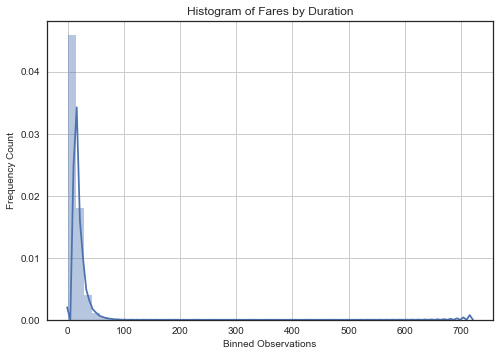

In [131]:
# histogram of trip duration

sns.distplot(time_v_distance['calc_tm_diff_in_min'])

plt.grid()
plt.title('Histogram of Fares by Duration') 
plt.xlabel("Binned Observations")  # x axis
plt.ylabel("Frequency Count")
fig.show();

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


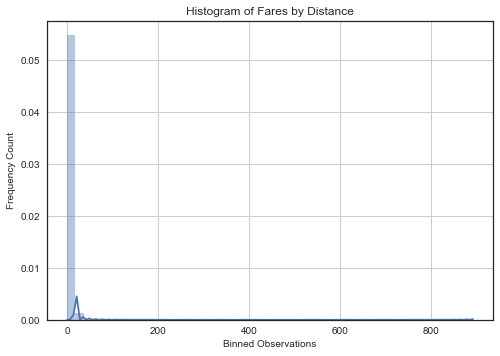

In [132]:
# histogram of trip duration

sns.distplot(time_v_distance['distance_km'])

plt.grid()
plt.title('Histogram of Fares by Distance') 
plt.xlabel("Binned Observations")  # x axis
plt.ylabel("Frequency Count")
fig.show();

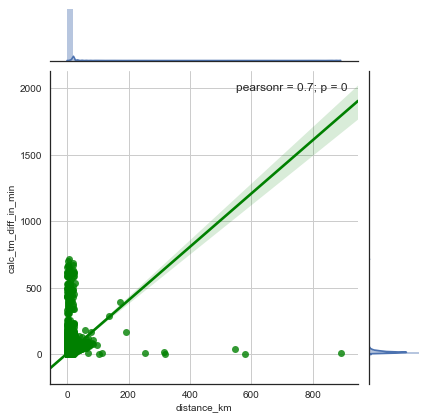

In [137]:


sns.jointplot(x="distance_km", y="calc_tm_diff_in_min", data=time_v_distance, kind='reg',
              joint_kws={'color':'green'})
plt.grid()
plt.show();

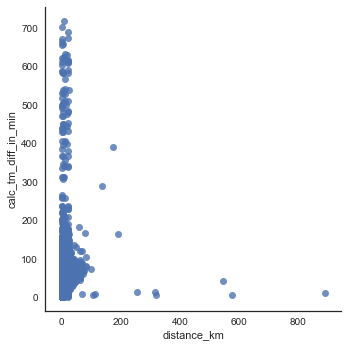

In [56]:

plt.figure(figsize=(15, 7))
sns.set(style="white")

sns.lmplot('distance_km', # Horizontal axis
           'calc_tm_diff_in_min', # Vertical axis
           data=df_nyc_analysis, # Data source
           fit_reg=False) # Don't fix a regression line
plt.show();

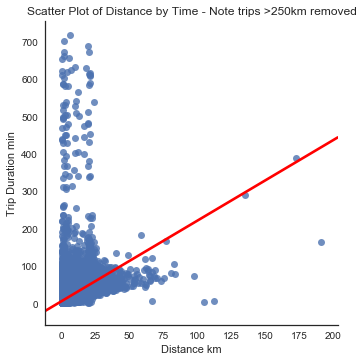

In [142]:
# Scatter plot of all data with trips >250KM filtered out
# trips >250km seem to be bad data with a short duration

scatter_data = df_nyc_analysis.query("distance_km < 250.000")  # filter out data where distance > 250KM data seems off
                                                            # removes 6 rows
scatter_data = scatter_data[['calc_tm_diff_in_min', 'distance_km']]

sns.set(style="white")

sns.lmplot('distance_km', # Horizontal axis
           'calc_tm_diff_in_min', # Vertical axis
           data=scatter_data, # Data source
           fit_reg=True, line_kws={'color': 'red'}) # adds a regression line

plt.title('Scatter Plot of Distance by Time - Note trips >250km removed')
plt.xlabel('Distance km')
plt.ylabel('Trip Duration min')
plt.show();

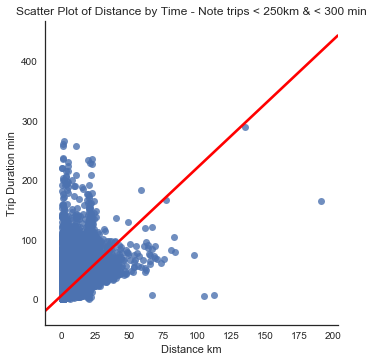

In [144]:
# Scatter plot of all data with trips >250KM filtered out
# trips >250km seem to be bad data with a short duration
# also filter out trips > 300 min to compare regression line with above

scatter_data2 = df_nyc_analysis.query("distance_km < 250.000 & calc_tm_diff_in_min < 300")  # filter out data where distance > 250KM data seems off
                                                            # removes 6 rows
scatter_data2 = scatter_data2[['calc_tm_diff_in_min', 'distance_km']]

sns.set(style="white")

sns.lmplot('distance_km', # Horizontal axis
           'calc_tm_diff_in_min', # Vertical axis
           data=scatter_data2, # Data source
           fit_reg=True, line_kws={'color': 'red'}) # adds a regression line

plt.title('Scatter Plot of Distance by Time - Note trips < 250km & < 300 min')
plt.xlabel('Distance km')
plt.ylabel('Trip Duration min')
plt.show();

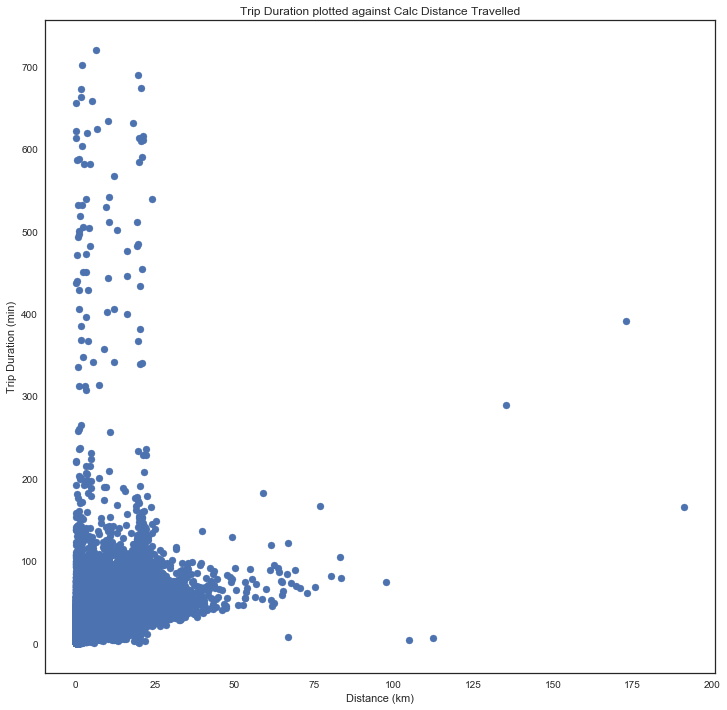

In [77]:
scatter_data = df_nyc_analysis.query("distance_km < 250.000")  # filter out data where distance > 250KM data seems off
                                                            # removes 6 rows
scatter_data = scatter_data[['calc_tm_diff_in_min', 'distance_km','Vendor']]
y = scatter_data['calc_tm_diff_in_min']
x = scatter_data['distance_km']

plt.figure(figsize=(12, 12))

plt.scatter(x,y)
plt.title ('Trip Duration plotted against Calc Distance Travelled')
plt.xlabel('Distance (km)')
plt.ylabel('Trip Duration (min)')
plt.show();

In [116]:
# Look at monthly distribution of rides...are there more rides in Jan vs June?

mavg_analysis = df_nyc_analysis[['pickup_datetime','pickup_dayofwk_nm','pickup_day_seg']]
mavg_analysis = mavg_analysis.set_index('pickup_datetime')
mavg_analysis['Fare_Cnt'] = 1
mavg_analysis.head()

,pickup_dayofwk_nm,pickup_day_seg,Fare_Cnt
pickup_datetime,,,
2016-03-14 17:24:55,Monday,Afternoon,1
2016-06-12 00:43:35,Sunday,Night,1
2016-01-19 11:35:24,Tuesday,Morning,1
2016-04-06 19:32:31,Wednesday,Evening,1
2016-03-26 13:30:55,Saturday,Afternoon,1


In [128]:
# Number of fares per month / Total Fares to determine % of fares for each month
#month = avg_analysis.resample('M').sum() / len(avg_analysis)

month = round((avg_analysis.resample('M').sum() / len(avg_analysis)) * 100,1)
month = month.set_index(month.index.strftime('%b'))  # convert to show month name
month = month.rename(columns={'Fare_Cnt': 'Pct_of_Total'})
month

,Pct_of_Total
Jan,15.800
Feb,16.300
Mar,17.600
Apr,17.300
May,17.000
Jun,16.100


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


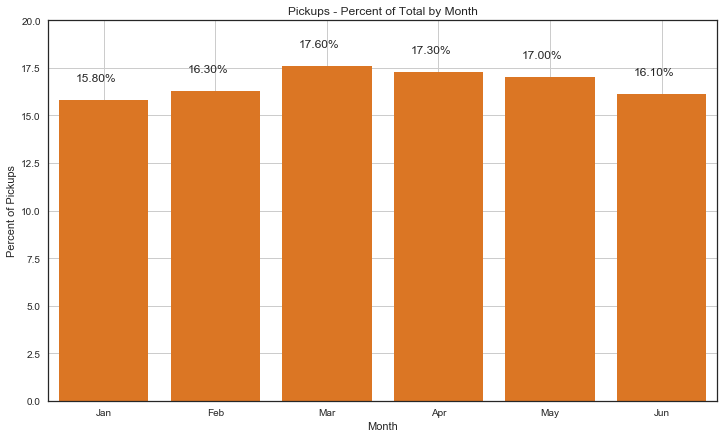

In [131]:
# graph percent of pickups by Month to show that there isn't really a season fluctuation

fig, ax = plt.subplots(figsize=(12, 7))

colors = [ "orange" ]  
myPalette = sns.xkcd_palette(colors)

sns.set(style="white")

sns.barplot(x=month.index, y='Pct_of_Total' , data=month, palette= myPalette)
plt.grid()
ax.set(title='Pickups - Percent of Total by Month', 
       xlabel='Month', ylabel='Percent of Pickups')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.ylim(0,20)
fig.show();

In [125]:
# are any days of the week busier then the other

day_avg = pd.DataFrame(round((avg_analysis.groupby(avg_analysis.pickup_dayofwk_nm)['Fare_Cnt'].sum() / len(avg_analysis)) * 100,1))
day_avg = day_avg.rename(columns={'Fare_Cnt': 'Pct_of_Total'})
day_avg['Sorter'] = [5,1,6,7,4,2,3]
day_avg.sort_values(by = ['Sorter'], inplace = True) 

day_avg

,Pct_of_Total,Sorter
pickup_dayofwk_nm,,
Monday,12.900,1
Tuesday,13.900,2
Wednesday,14.400,3
Thursday,15.000,4
Friday,15.300,5
Saturday,15.100,6
Sunday,13.400,7


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


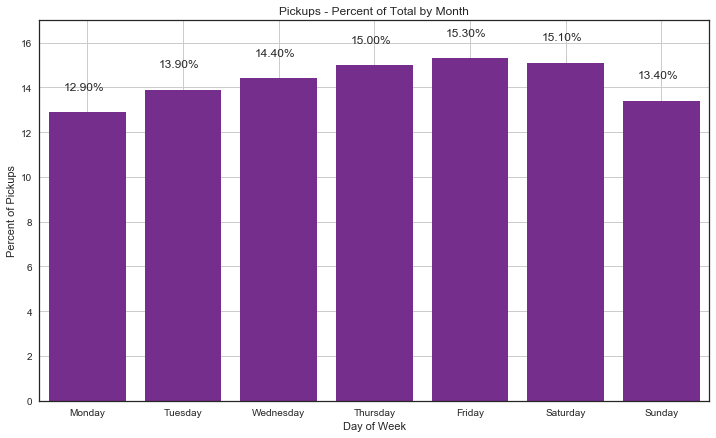

In [127]:
# graph percent of pickups by Day of week  to show weekly fluctuation fluctuation

fig, ax = plt.subplots(figsize=(12, 7))

colors = [ "purple" ]  
myPalette = sns.xkcd_palette(colors)

sns.set(style="white")

sns.barplot(x=day_avg.index, y='Pct_of_Total' , data=day_avg, palette= myPalette)
plt.grid()
ax.set(title='Pickups - Percent of Total by Month', 
       xlabel='Day of Week', ylabel='Percent of Pickups')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
#ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #label y axis nicely
plt.ylim(0,17)
fig.show();

In [27]:
avg_analysis.head()

,pickup_datetime,pickup_dayofwk_nm,pickup_day_seg
0,2016-03-14 17:24:55,Monday,Afternoon
1,2016-06-12 00:43:35,Sunday,Night
2,2016-01-19 11:35:24,Tuesday,Morning
3,2016-04-06 19:32:31,Wednesday,Evening
4,2016-03-26 13:30:55,Saturday,Afternoon


In [25]:
df_nyc_analysis.head()

,id,vendor_id,Vendor,pickup_datetime,dropoff_datetime,pickup_dayofwk_num,pickup_dayofwk_nm,pickup_weekend,pickup_hr,pickup_day_seg,...,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,calc_tm_diff_in_min,passenger_count,passenger_grp,distance_km,Conditions
0,id2875421,2,Yellow Taxi,2016-03-14 17:24:55,2016-03-14 17:32:30,0,Monday,Weekday,17,Afternoon,...,-73.982,40.768,-73.965,40.766,0.120,7.580,1,1-4 Passengers,1.498,Overcast
1,id2377394,1,Green Taxi,2016-06-12 00:43:35,2016-06-12 00:54:38,6,Sunday,Weekend,0,Night,...,-73.980,40.739,-73.999,40.731,0.180,11.050,1,1-4 Passengers,1.804,Unknown
2,id3858529,2,Yellow Taxi,2016-01-19 11:35:24,2016-01-19 12:10:48,1,Tuesday,Weekday,11,Morning,...,-73.979,40.764,-74.005,40.710,0.580,35.400,1,1-4 Passengers,6.381,Clear
3,id3504673,2,Yellow Taxi,2016-04-06 19:32:31,2016-04-06 19:39:40,2,Wednesday,Weekday,19,Evening,...,-74.010,40.720,-74.012,40.707,0.120,7.150,1,1-4 Passengers,1.485,Clear
4,id2181028,2,Yellow Taxi,2016-03-26 13:30:55,2016-03-26 13:38:10,5,Saturday,Weekend,13,Afternoon,...,-73.973,40.793,-73.973,40.783,0.120,7.250,1,1-4 Passengers,1.188,Clear


In [62]:
# passenger distribution by day of week

print("Pct of single passenger fares is", round((len(df_nyc_analysis.query("passenger_count == 1")) / len(df_nyc_analysis)*100)), "%")

Pct of single passenger fares is 71 %


In [63]:
# place passenger data into another df called pass_analysis

df_nyc_analysis['pass_category'] = np.where(df_nyc_analysis.passenger_count == 1, '1 Passenger', '2+ Passengers')
df_nyc_analysis['pass_category'] = df_nyc_analysis.pass_category.astype('category')  # makes the field a category
pass_analysis = df_nyc_analysis[['pass_category','day_category']]

In [64]:
# make a crosstab tablulation of passenger category by day category then pivot it with .T

ct = pd.crosstab(pass_analysis.pass_category, pass_analysis.day_category)
ct = ct.T
ct

pass_category,1 Passenger,2+ Passengers
day_category,,
Monday,134686,51865
Tuesday,146972,54827
Wednesday,152342,56906
Thursday,157704,59799
Friday,157975,64491
Saturday,147116,72683
Sunday,131434,62830


In [65]:
# calculate percent total by column...round to a whole number and cast from float to int

cols = ['1 Passenger','2+ Passengers']
ct[cols] = round(ct[cols].div(ct[cols].sum(axis=1), axis=0).multiply(100)).astype(int)

ct 

pass_category,1 Passenger,2+ Passengers
day_category,,
Monday,72,28
Tuesday,73,27
Wednesday,73,27
Thursday,73,27
Friday,71,29
Saturday,67,33
Sunday,68,32


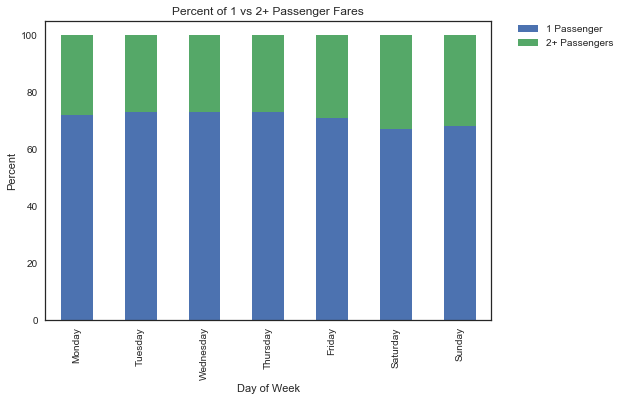

In [68]:
# plot bar chart...note bar chart pivots data based on stacking

plt.figure(figsize=(10,12))


ct.plot.bar(stacked=True)  # stacked pivots the dataframe

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # Place a legend to the right of this smaller subplot.
plt.title("Percent of 1 vs 2+ Passenger Fares")
plt.xlabel("Day of Week")
plt.ylabel("Percent")

plt.show();

In [193]:
# display crosstab of percent 1 vs 2+ passenger fares by day of week

ct_display = ct.T
ct_display

day_category,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
pass_category,,,,,,,
1 Passenger,72,73,73,73,71,67,68
2+ Passengers,28,27,27,27,29,33,32


In [200]:
# calculate percentage of rides <= 15km

print("Percentage of rides <= 15km is: ", round(((len(df_nyc_analysis.query("distance_km <=15.000")) / len(df_nyc_analysis)) *100)))

Percentage of rides <= 15km 97


In [48]:
dist_time_day = df_nyc_analysis[['day_category','pickup_day_seg','distance_km',]]
dist_time_day = dist_time_day.query("distance_km <15.000")

dist_time_day['pickup_day_seg'] = dist_time_day.pickup_day_seg.astype('category')  # makes the field a category

# set order of values in the category
dist_time_day['pickup_day_seg'] = dist_time_day.pickup_day_seg.cat.set_categories(['Night', 'Morning','Afternoon','Evening'])


dist_time_day['bin'] = pd.cut(dist_time_day['distance_km'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
                              labels=['0', '1', '2','3','4','5','6','7','8','9','10','11','12','13','14'])

dist_time_day.head()

,day_category,pickup_day_seg,distance_km,bin
0,Monday,Afternoon,1.498,1
1,Sunday,Night,1.804,1
2,Tuesday,Morning,6.381,6
3,Wednesday,Evening,1.485,1
4,Saturday,Afternoon,1.188,1


In [49]:
ct_bins = pd.crosstab(dist_time_day.bin, dist_time_day.pickup_day_seg)

#ct_bins = ct_bins.T

ct_bins

pickup_day_seg,Night,Morning,Afternoon,Evening
bin,,,,
0,22881,63513,77884,72515
1,39050,118998,143278,149378
2,28302,64314,78032,94452
3,18478,33589,38251,54538
4,13235,19074,21595,33908
5,10285,12617,13616,21701
6,8409,8238,8750,14951
7,6213,5351,5267,9905
8,4865,4890,5430,7883


In [50]:
cols = ['Night', 'Morning','Afternoon','Evening']
ct_bins[cols] = round(ct_bins[cols].div(ct_bins[cols].sum(axis=1), axis=0).multiply(100)).astype(int)

ct_bins

pickup_day_seg,Night,Morning,Afternoon,Evening
bin,,,,
0,10,27,33,31
1,9,26,32,33
2,11,24,29,36
3,13,23,26,38
4,15,22,25,39
5,18,22,23,37
6,21,20,22,37
7,23,20,20,37
8,21,21,24,34


In [44]:
cols = ['Night','Morning','Afternoon','Evening']
ct_bins[cols] = round(ct_bins[cols].div(ct_bins[cols].sum(axis=1), axis=0).multiply(100)).astype(int)

ct_bins

pickup_day_seg,Afternoon,Evening,Morning,Night
bin,,,,
0,33,31,27,10
1,32,33,26,9
2,29,36,24,11
3,26,38,23,13
4,25,39,22,15
5,23,37,22,18
6,22,37,20,21
7,20,37,20,23
8,24,34,21,21


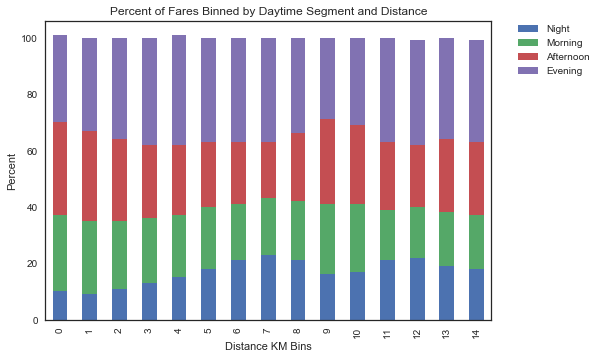

In [60]:
# plot bar chart...note bar chart pivots data based on stacking
plt.figure(figsize=(10,12))

ct_bins.plot.bar(stacked=True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # Place a legend to the right of this smaller subplot.
plt.title("Percent of Fares Binned by Daytime Segment and Distance")
plt.xlabel("Distance KM Bins")
plt.ylabel("Percent")
plt.show();

In [70]:
ct_bins2 = pd.crosstab(dist_time_day.bin, dist_time_day.day_category)

ct_bins2

day_category,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
bin,,,,,,,
0,31125,34222,35414,36056,37277,34328,28371
1,58213,64947,66735,68516,69527,66745,56021
2,32957,36255,37945,39369,40646,42266,35662
3,17974,19355,20292,21315,21917,23635,20368
4,10666,11618,12145,12526,13193,14551,13113
5,7018,7692,8176,8374,8603,9644,8712
6,4897,5096,5361,5845,6018,6849,6282
7,3348,3432,3612,3899,3950,4180,4315
8,3090,3182,3165,3612,3452,3074,3493


In [77]:
cols = ["Monday","Tuesday","Wednesday","Thursday","Friday", "Saturday", "Sunday"]
ct_bins2[cols] = round(ct_bins2[cols].div(ct_bins2[cols].sum(axis=1), axis=0).multiply(100),3)

ct_bins2

day_category,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
bin,,,,,,,
0,13.100,14.100,15.200,15.200,16.200,14.100,12.100
1,13.091,14.091,15.182,15.182,15.182,15.182,12.091
2,12.100,14.100,14.100,15.200,15.200,16.200,13.100
3,12.100,13.100,14.100,15.200,15.200,16.200,14.100
4,12.000,13.000,14.000,14.000,15.000,17.000,15.000
5,12.000,13.000,14.000,14.000,15.000,17.000,15.000
6,12.000,13.000,13.000,14.000,15.000,17.000,16.000
7,12.611,12.611,13.711,14.711,14.711,15.822,15.822
8,13.000,14.000,14.000,16.000,15.000,13.000,15.000


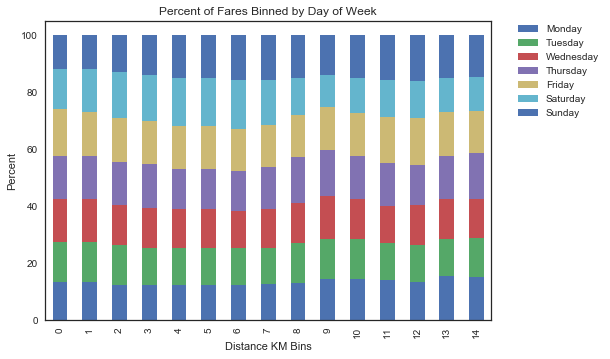

In [79]:
# plot bar chart...note bar chart pivots data based on stacking
plt.figure(figsize=(10,12))

ct_bins2.plot.bar(stacked=True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # Place a legend to the right of this smaller subplot.
plt.title("Percent of Fares Binned by Day of Week")
plt.xlabel("Distance KM Bins")
plt.ylabel("Percent")
plt.show();

In [14]:
weather_data = pd.DataFrame(df_nyc_analysis.groupby(['Conditions']).size())
weather_data = weather_data.rename(columns={0: 'Cnt'}).reset_index()
weather_data

,Conditions,Cnt
0,Clear,727354
1,Haze,30479
2,Heavy Rain,1598
3,Heavy Snow,106
4,Light Freezing Fog,1
5,Light Freezing Rain,371
6,Light Rain,48805
7,Light Snow,8763
8,Mostly Cloudy,92214
9,Overcast,335479


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


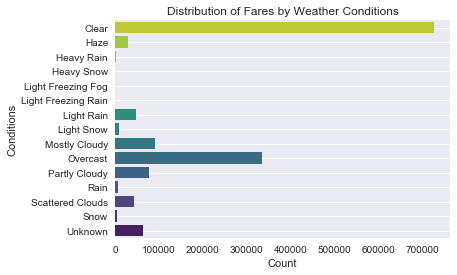

In [24]:
sns.barplot(x='Cnt', y='Conditions', data=weather_data, palette = 'viridis_r')
#ax.set_xlabel('totalCount')
plt.grid()
plt.xlabel("Count")
plt.title("Distribution of Fares by Weather Conditions")

In [200]:
# prep data to determine top 10 pickup days

df_top10_days = df_nyc_analysis[['pickup_datetime']]
df_top10_days['pickup'] = df_top10_days['pickup_datetime'].dt.date
df_top10_days = df_top10_days.drop('pickup_datetime', axis=1)
#df_top10_days = df_top10_days.sort_values(['pickup'], ascending=False)
df_top10_days['value'] = 1

df_top10_days.head()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,pickup,value
0,2016-03-14,1
1,2016-06-12,1
2,2016-01-19,1
3,2016-04-06,1
4,2016-03-26,1


In [201]:
# What are our top 10 pickup days
df_top10_days.groupby(['pickup']).pickup.value_counts().nlargest(10)

pickup      pickup    
2016-04-09  2016-04-09    9744
2016-04-16  2016-04-16    9558
2016-03-05  2016-03-05    9556
2016-04-02  2016-04-02    9285
2016-02-13  2016-02-13    9258
2016-05-07  2016-05-07    9242
2016-04-15  2016-04-15    9228
2016-03-12  2016-03-12    9209
2016-03-04  2016-03-04    9201
2016-02-27  2016-02-27    9186
Name: pickup, dtype: int64

In [203]:
# What are our top 10 pickup days
df_top10_days.groupby(['pickup']).pickup.value_counts().nsmallest(10)

pickup      pickup    
2016-01-23  2016-01-23    1635
2016-01-24  2016-01-24    3360
2016-05-30  2016-05-30    5542
2016-01-25  2016-01-25    6048
2016-01-03  2016-01-03    6321
2016-05-29  2016-05-29    6332
2016-01-02  2016-01-02    6472
2016-01-04  2016-01-04    6694
2016-06-20  2016-06-20    6868
2016-01-26  2016-01-26    6896
Name: pickup, dtype: int64

(pickup      pickup    
 2016-04-09  2016-04-09    9744
 2016-04-16  2016-04-16    9558
 2016-03-05  2016-03-05    9556
 2016-04-02  2016-04-02    9285
 2016-02-13  2016-02-13    9258
 2016-05-07  2016-05-07    9242
 2016-04-15  2016-04-15    9228
 2016-03-12  2016-03-12    9209
 2016-03-04  2016-03-04    9201
 2016-02-27  2016-02-27    9186
 Name: pickup, dtype: int64, pickup      pickup    
 2016-01-23  2016-01-23    1635
 2016-01-24  2016-01-24    3360
 2016-05-30  2016-05-30    5542
 2016-01-25  2016-01-25    6048
 2016-01-03  2016-01-03    6321
 2016-05-29  2016-05-29    6332
 2016-01-02  2016-01-02    6472
 2016-01-04  2016-01-04    6694
 2016-06-20  2016-06-20    6868
 2016-01-26  2016-01-26    6896
 Name: pickup, dtype: int64)

In [237]:
# average number of fares per day
# total number of fares / total number of days

df_top10_day = pd.DataFrame(df_top10_days.groupby(['pickup']).value.size())  #put data in a dataframe

print("Average number of daily fares:", round(df_top10_day['value'].sum() /len(df_top10_day)).astype(int))

Average number of daily fares: 7976
